In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta
from collections import Counter 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [19]:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

case_data = pd.read_csv('Case.csv')
patient_info = pd.read_csv('PatientInfo.csv')
patient_route = pd.read_csv('PatientRoute.csv')
policy_data = pd.read_csv('Policy.csv')
region_data = pd.read_csv('Region.csv')
search_data = pd.read_csv('SearchTrend.csv')
seoul_float_data = pd.read_csv('SeoulFloating.csv')
time_data = pd.read_csv('Time.csv')
time_age_data = pd.read_csv('TimeAge.csv')
time_gender_data = pd.read_csv('TimeGender.csv')
time_province_data = pd.read_csv('TimeProvince.csv')
weather_data = pd.read_csv('Weather.csv')

# Any results you write to the current directory are saved as output.

In [4]:
case_data.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [35]:
patient_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [6]:
patient_route.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [7]:
policy_data.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [8]:
region_data.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [9]:
search_data.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [11]:
time_data.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [12]:
time_age_data.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [13]:
time_gender_data.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [21]:
patient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   sex                 3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

In [22]:
patient_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [74]:
## 코로나-19환자 성별 비율

male = patient_info[patient_info.sex=="male"]
female = patient_info[patient_info.sex=="female"]
import plotly.graph_objs as go
trace1 = go.Bar(x = female.sex,
             y = female.sex.value_counts().values,
               name = "여성",
                marker = dict(color = 'rgba(255, 174, 255, 0.8)'),
                             
                text = female.country,
             )
trace2 = go.Bar(x = male.sex,
             y = male.sex.value_counts().values,
               name = "남성",
                marker = dict(color = 'rgba(10, 129,90, 0.8)'),
                            
                text = male.country,
             )

data = [trace1,trace2]
layout={
  'xaxis': {'title': 'Sex'},
  'barmode': 'group',
  'title': '환자 성별',
   "font": {"size":20} ,
    "width":500,
    "height":500
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [24]:
patient_info.province.value_counts()

Gyeongsangbuk-do     1230
Gyeonggi-do           677
Seoul                 633
Chungcheongnam-do     143
Busan                 134
Gyeongsangnam-do      116
Incheon                92
Daegu                  63
Gangwon-do             51
Sejong                 46
Chungcheongbuk-do      45
Ulsan                  43
Daejeon                40
Gwangju                30
Jeollabuk-do           17
Jeollanam-do           15
Jeju-do                13
Name: province, dtype: int64

In [28]:
## 세계 지도로 보는 대한민국 환자 분포
data = [dict(
    type = "scattergeo",
    lon = case_data["longitude"],
    lat = case_data["latitude"],
    hoverinfo = "text",
    text = "Province:"+patient_info.province,
    mode = "markers",
    marker = dict(
        sizemode = "area",
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        
        opacity = 0.7),
)]
layout = dict(
    title = ' 대한민국 코로나 분포',
    hovermode='closest',
    geo = dict(showframe = False, showland = True, showcoastlines = True, showcountries = True,landcolor = 'rgb(217, 217, 217)',
              subunitwidth = 1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor = "rgb(5, 5, 5)")
)



fig = go.Figure(data = data,layout = layout)
iplot(fig)

Text(0, 0.5, 'Infected People')

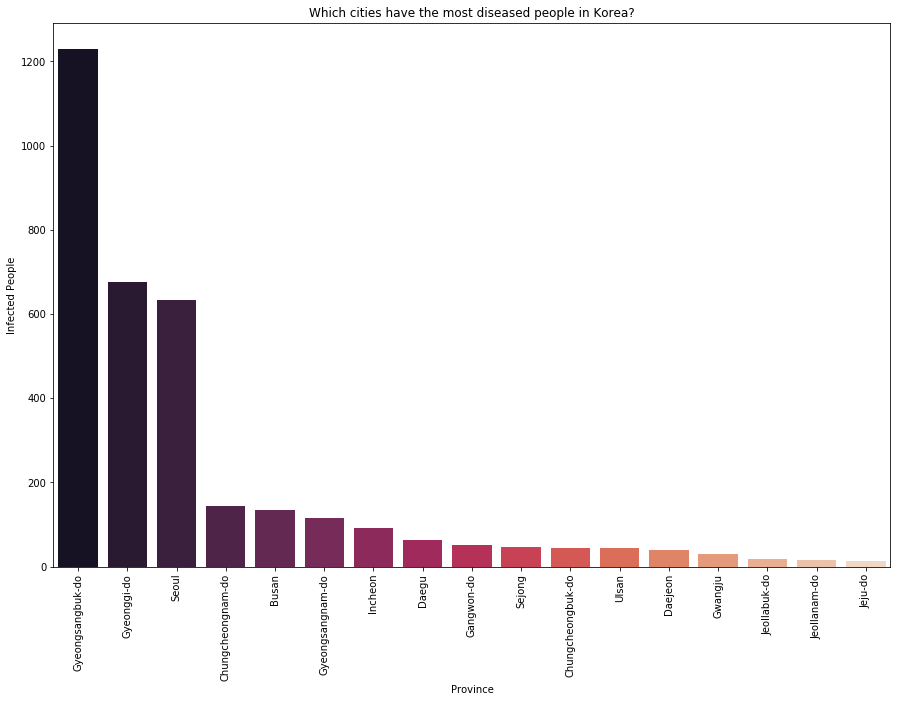

In [32]:
## 도(Province)별 감염자 

p = patient_info.province.value_counts().index

y = patient_info.province.value_counts().values
plt.figure(figsize = (15,10))
sns.barplot(x = p,y = y,palette = "rocket")
plt.xlabel("Province")
plt.xticks(rotation = 90)
plt.title("Which cities have the most diseased people in Korea?")
plt.ylabel("Infected People")

In [33]:
patient_info.age.value_counts()

20s     802
50s     597
40s     455
30s     438
60s     401
70s     204
80s     156
10s     150
0s       55
90s      45
100s      1
Name: age, dtype: int64

In [47]:
## 연령별 감염자 수

a = patient_info.age.value_counts().values
b = patient_info.age.value_counts().index
import plotly.express as px

fig = px.bar(x = b,y = a,title = "감염자 연령 비율")
fig.show()

In [48]:
## 사망률

death = patient_info[patient_info.state == "deceased"]
released = patient_info[patient_info.state == "released"]
isolated = patient_info[patient_info.state == "isolated"]
data = pd.concat([death,released,isolated])
data1 = [each for each in data.state]
labels = data.state
fig = {
  "data": [
    {
      "values":labels.value_counts().values,
      "labels": labels.value_counts().index,
      "domain": {"x": [0, .8]},
      "name": "Death or Released",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],"layout": {
        "title":"격리해제, 격리중, 사망 그래프",
    
        "annotations": [
            { "font": { "size": 25},
             
              "showarrow": False,
                 "text":"사망률",
                "x": .4,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

In [53]:
# 사망자의 연령
death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 108 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          69 non-null     int64  
 1   global_num          59 non-null     float64
 2   sex                 69 non-null     object 
 3   birth_year          64 non-null     float64
 4   age                 69 non-null     object 
 5   country             69 non-null     object 
 6   province            69 non-null     object 
 7   city                50 non-null     object 
 8   disease             18 non-null     object 
 9   infection_case      29 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      4 non-null      float64
 13  symptom_onset_date  6 non-null      object 
 14  confirmed_date      69 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

In [54]:
death.age.value_counts()

80s    22
70s    19
60s    11
90s     7
50s     7
40s     2
30s     1
Name: age, dtype: int64

In [55]:
death["num_age"]=[2020-each for each in death.birth_year]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

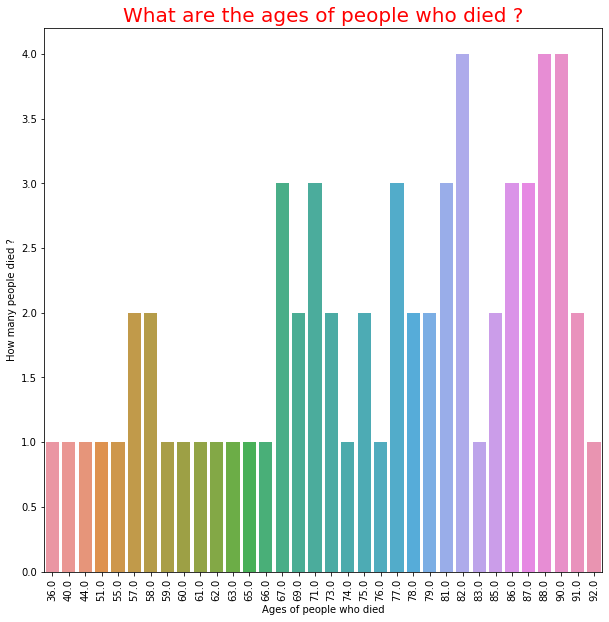

In [57]:
plt.figure(figsize = (10,10))
sns.barplot(x = death.num_age.value_counts().index,y = death.num_age.value_counts().values)
plt.ylabel("How many people died ?")
plt.xlabel("Ages of people who died")
plt.title("What are the ages of people who died ?",fontsize = 20,color = "red")
plt.xticks(rotation = 90)

In [60]:
data = {"y":death.num_age.value_counts().values,
      "x":death.num_age.value_counts().index,
      "mode":"markers",
      "marker":{"color":"rgb(10,10,10)"},
      "text":death.sex};
layout = {"xaxis":{"title":"나이"},"title":"사망자 연령"}
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [61]:
## 대한민국 바이러스 검사 수 

In [63]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       102 non-null    object
 1   time       102 non-null    int64 
 2   test       102 non-null    int64 
 3   negative   102 non-null    int64 
 4   confirmed  102 non-null    int64 
 5   released   102 non-null    int64 
 6   deceased   102 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.7+ KB


In [70]:
time_data["month"] = [int(each.split("-")[1])for each in time_data.date]
January = time_data[time_data.month == 1]
February = time_data[time_data.month == 2]
March = time_data[time_data.month == 3]
x = ["January","February","March"]
a = 0
for each in January.test:
    a = each + a
b = 0
for each in February.test:
    b = each + b
c = 0
for each in March.test:
    c = each + c    
y = [a,b,c]
df = [[x,y]]
trace = go.Scatter( x = x,
                    y = y,
                    mode = "lines+markers",
                    
                    marker = dict(color = 'rgba(240, 1, 17, 0.8)')
                    )
layout = dict(title = "대한민국 1, 2, 3월 검사 수", xaxis = dict(title= '월',ticklen = 5,zeroline = False),
            yaxis = dict(title = "검사 수"))
data = [trace]
fig = dict(data = data,layout = layout)
iplot(fig)